In [12]:
# Enable outputting results interactively. 
# All the results from code in a given cell will be displayed instead of only the last one.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
import pandas as pd
import pickle
import numpy as np
import sqlite3
import math
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
calendar =  pickle.load( open( "../data/all_SF_calendar.p", "rb" ) )
calendar.shape
# calendar['minimum_nights'].value_counts()

# limit to listings where the min. nights is less than 30 days. listings with 30 days + requirement are exempt from the regulation.

# calendar = calendar[calendar['minimum_nights'] <30 ]
# calendar.shape

(49522872, 9)

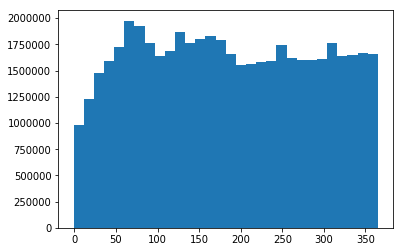

In [15]:
plt.hist(calendar['lead_time'], bins=30);


In [11]:
calendar_t.groupby('listing_id')['lead_time'].median()

listing_id
958         129.0
2822        108.5
3850         90.0
5021         75.0
5193        117.0
5841        110.0
5858         94.0
6810         69.0
6906         92.5
7918         92.0
8014        109.0
8142         98.0
8339         53.0
8567        113.0
8739        104.0
8775        108.0
9225        107.0
10251       107.0
10578        97.0
10819       113.0
10820       124.0
10824       126.0
10828        88.5
10829        93.0
10832       117.0
10834        92.0
10840        80.5
10842        79.0
11009        94.0
11319       103.5
            ...  
34240899     98.5
34245238     95.5
34246050     56.5
34247471    122.5
34259043     18.0
34262369     50.5
34277623     70.5
34279342    143.5
34283628     19.0
34287875      9.5
34289463     95.0
34289989     92.0
34306495    122.0
34306965     44.0
34314752     90.0
34315002     93.5
34315627     52.5
34316297    134.0
34317629     95.5
34336032     93.0
34340281    105.0
34343963     49.0
34344497    125.5
34345840     94.0

In [92]:
(calendar['minimum_nights'].isnull()).sum()

54069618

In [10]:
conn = sqlite3.connect("airbnb.db")

calendar.to_sql('cal_db', conn, if_exists='replace')

In [4]:
listings_scores = pd.read_sql_query(
    'select * from listings_scores_db',conn)
listings_scores.head()

,level_0,index,listing_id,property_type_c,room_type,host_since,first_scraped_dt,last_scraped_dt,first_review_dt,last_review_dt,...,listing_day_diff,review_month_diff,review_day_diff,overall_scores,accuracy_scores,communication_scores,cleaniness_scores,location_scores,checkin_scores,value_scores
0,0,0,958,APARTMENT,Entire home/apt,2008-07-31,2015-05-04,2019-05-03,2009-07-23,2019-04-17,...,3571.0,116.799113,3555.0,97.022222,10.0,10.0,10.00,10.0000,10.0,9.866667
1,1,1,2822,HOUSE,Private room,2008-09-24,2015-09-02,2016-06-02,2010-07-25,2016-05-08,...,2139.0,69.455225,2114.0,98.000000,10.0,10.0,10.00,9.0000,10.0,10.000000
2,2,2,3850,HOUSE,Private room,2008-12-08,2015-05-04,2015-05-04,2009-07-16,2015-01-01,...,2118.0,65.545494,1995.0,93.000000,9.0,10.0,9.00,9.0000,10.0,9.000000
3,3,3,5021,APARTMENT,Entire home/apt,2009-01-29,2016-12-03,2018-01-17,2011-07-04,2017-12-31,...,2389.0,77.931785,2372.0,90.666667,9.0,10.0,9.00,10.0000,10.0,8.000000
4,4,4,5193,APARTMENT,Entire home/apt,2009-02-05,2015-05-04,2017-03-02,2009-09-29,2016-12-20,...,2711.0,86.704039,2639.0,92.812500,9.0,10.0,9.75,9.9375,10.0,9.000000


In [60]:
room_type = pd.read_sql_query(
    'select listing_id, property_type_c, room_type from listings_scores_db group by listing_id, property_type_c, room_type ;',conn)
room_type.shape

room_type.to_sql('room_type_db', conn, if_exists='replace')

(29533, 3)

In [61]:
prop = pd.read_sql_query(
    'select a.*, b.property_type_c, b.room_type from cal_db as a inner join room_type_db as b on a.listing_id = b.listing_id',conn)
prop.head()

,index,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,file_scraped_dt,lead_time,property_type_c,room_type
0,0,34158472,2019-05-03 00:00:00,f,$399.00,$399.00,2.0,1125.0,2019-05-03 00:00:00,0,HOUSE,Entire home/apt
1,1,34158472,2019-05-04 00:00:00,f,$399.00,$399.00,2.0,1125.0,2019-05-03 00:00:00,1,HOUSE,Entire home/apt
2,2,34158472,2019-05-05 00:00:00,t,$399.00,$399.00,2.0,1125.0,2019-05-03 00:00:00,2,HOUSE,Entire home/apt
3,3,34158472,2019-05-06 00:00:00,t,$399.00,$399.00,2.0,1125.0,2019-05-03 00:00:00,3,HOUSE,Entire home/apt
4,4,34158472,2019-05-07 00:00:00,t,$399.00,$399.00,2.0,1125.0,2019-05-03 00:00:00,4,HOUSE,Entire home/apt


In [62]:
prop.room_type.value_counts()

Entire home/apt    1941902
Private room       1765328
Shared room          65757
Name: room_type, dtype: int64

In [63]:
# these property types account for 95% of the listings.

entire_home = prop[prop['room_type'] == 'Entire home/apt']

entire_home_sub = entire_home[entire_home['property_type_c'].isin(['APARTMENT', 'HOUSE', 'CONDOMINIUM', 'GUEST SUITE', 'LOFT'])] 
entire_home_sub.shape

(1796219, 12)

In [67]:
entire_home_sub.to_sql('entire_home_sub', conn, if_exists='replace')

test = pd.read_sql_query(
    'select listing_id, date, count(distinct(price)) as count_price from entire_home_sub group by listing_id, date order by listing_id, date;',conn)
test.head()

,listing_id,date,count_price
0,958,2019-01-09 00:00:00,1
1,958,2019-01-10 00:00:00,1
2,958,2019-01-11 00:00:00,1
3,958,2019-01-12 00:00:00,1
4,958,2019-01-13 00:00:00,1


In [70]:
entire_home_sub.date.value_counts()

2019-05-07 00:00:00    9926
2019-05-06 00:00:00    9926
2019-05-08 00:00:00    9926
2019-05-05 00:00:00    9926
2019-05-09 00:00:00    9926
2019-05-15 00:00:00    9925
2019-05-10 00:00:00    9925
2019-05-04 00:00:00    9925
2019-05-03 00:00:00    9925
2019-05-14 00:00:00    9925
2019-05-11 00:00:00    9923
2019-05-12 00:00:00    9923
2019-05-20 00:00:00    9923
2019-05-13 00:00:00    9923
2019-05-16 00:00:00    9923
2019-05-19 00:00:00    9923
2019-05-17 00:00:00    9922
2019-05-18 00:00:00    9922
2019-05-23 00:00:00    9921
2019-05-21 00:00:00    9921
2019-05-22 00:00:00    9921
2019-05-29 00:00:00    9920
2019-05-25 00:00:00    9920
2019-05-26 00:00:00    9920
2019-05-28 00:00:00    9920
2019-05-30 00:00:00    9920
2019-05-27 00:00:00    9920
2019-05-24 00:00:00    9920
2019-05-31 00:00:00    9919
2019-07-04 00:00:00    9912
                       ... 
2019-10-05 00:00:00    1989
2019-10-04 00:00:00    1989
2019-10-06 00:00:00    1989
2019-10-09 00:00:00    1988
2019-10-20 00:00:00 

In [17]:
test['count_price'].unique()

# a given listing for a given date could have up to 15 different prices. the prices vary with the lead time.

array([5, 4, 3, 2, 1], dtype=int64)

In [53]:

test2 = pd.read_sql_query(
    'select * from entire_home_sub where listing_id = 958 and date = "2019-07-03 00:00:00";',conn)
test2.head(30)

,level_0,index,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,file_scraped_dt,lead_time,property_type_c,room_type
0,1147,1148,958,2019-07-03 00:00:00,t,$137.00,$137.00,1.0,30.0,2019-05-03 00:00:00,61,APARTMENT,Entire home/apt
1,770611,1331177,958,2019-07-03 00:00:00,t,$135.00,$135.00,1.0,30.0,2019-04-03 00:00:00,91,APARTMENT,Entire home/apt
2,1530739,2648148,958,2019-07-03 00:00:00,t,$145.00,$145.00,1.0,30.0,2019-03-06 00:00:00,119,APARTMENT,Entire home/apt
3,2272905,3942873,958,2019-07-03 00:00:00,t,$150.00,$150.00,1.0,30.0,2019-02-01 00:00:00,152,APARTMENT,Entire home/apt
4,3024224,5245373,958,2019-07-03 00:00:00,t,$179.00,$179.00,1.0,30.0,2019-01-09 00:00:00,175,APARTMENT,Entire home/apt


In [54]:
# test.set_index(pd.DatetimeIndex(test['date']))